In [2]:
# Load Libraries
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt


In [4]:
# Load the Titanic Dataset
data = sns.load_dataset('titanic')

# Preprocess the dataset
# Select relevant features and drop rows with missing values
features = ['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']
data = data[features + ['survived']].dropna()

In [6]:
# Convert categorical columns to numerical
data['sex'] = data['sex'].map({'male': 0, 'female': 1})
data['embarked'] = data['embarked'].map({'C': 0, 'Q': 1, 'S': 2})

In [8]:
# Define features and target
X = data[features]
y = data['survived']


In [10]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Decision Tree Classifier
clf = DecisionTreeClassifier(criterion='gini', max_depth=4, min_samples_split=2, random_state=42)
clf.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=4, random_state=42)

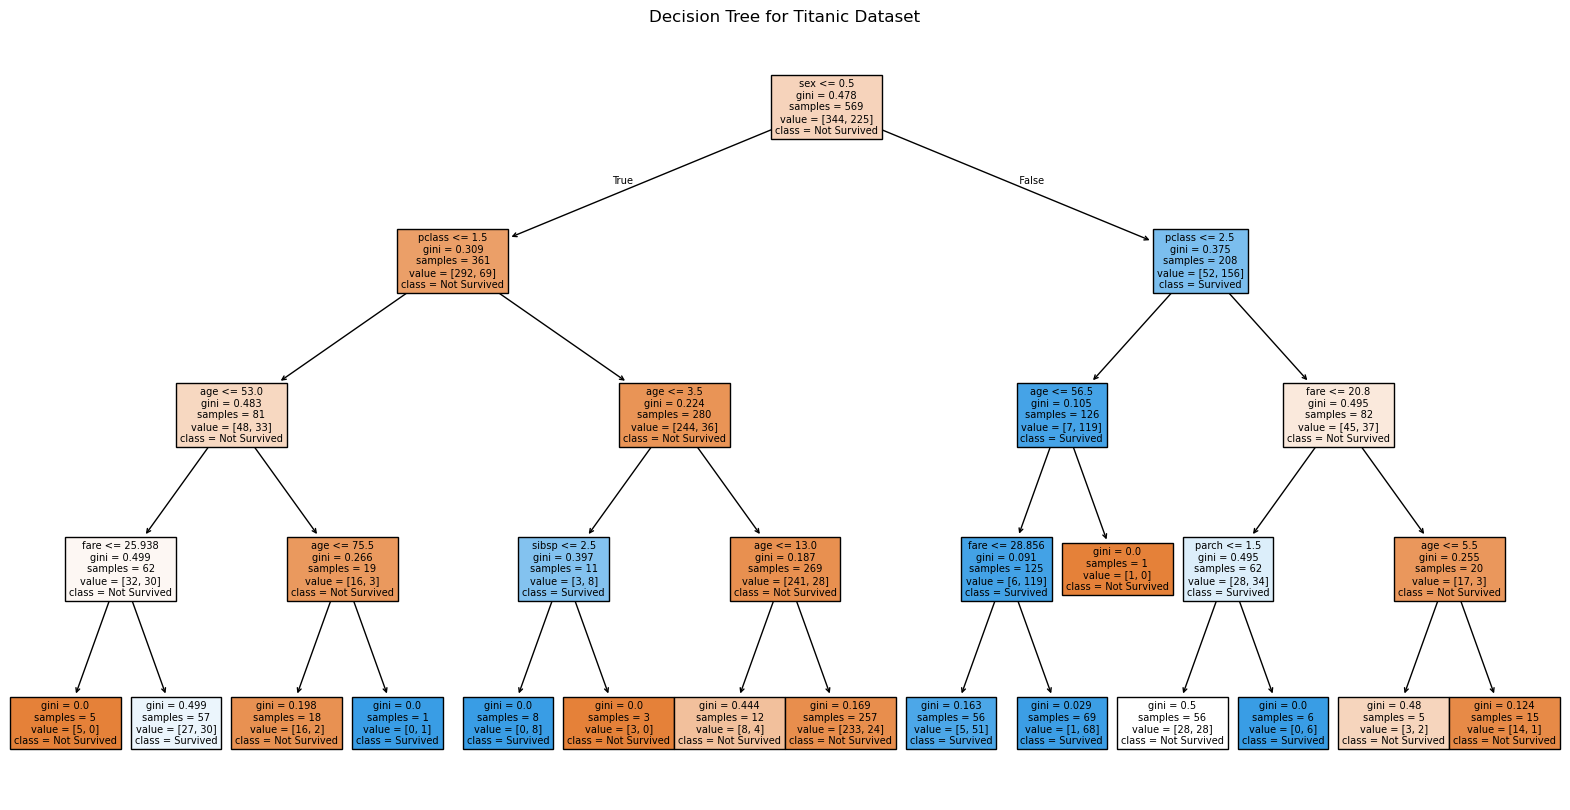

In [12]:
# Visualize the Decision Tree
plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=features, class_names=['Not Survived','Survived'], filled=True)
plt.title("Decision Tree for Titanic Dataset")
plt.show()


In [14]:
# Evaluate the model
y_pred = clf.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(f"Precision: {precision_score(y_test, y_pred):.2f}")
print(f"Recall: {recall_score(y_test, y_pred):.2f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.2f}")

Accuracy: 0.71
Precision: 0.72
Recall: 0.54
F1 Score: 0.62
